# EDA for Spring

In [1]:
# preprocessing
import numpy as np
import pandas as pd
import tqdm

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# graph
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load data
spring = pd.read_csv('../data/spring_train.csv')

In [3]:
spring

,stn,year,ta,td,hm,ws,rn,re,ww,ts,si,ss,sn,mm,dd,hh,sunriseh,sunrisem,sunseth,sunsetm
0,1,A,-9.9,-10.7,93.9,0.6,0.0,0.0,H,-1.3,NaN,NaN,NaN,2,1,0,7,36,17,55
1,1,A,-10.8,-11.6,93.8,0.6,0.0,0.0,H,-1.5,NaN,NaN,NaN,2,1,1,7,36,17,55
2,1,A,-11.4,-12.1,94.6,0.7,0.0,0.0,H,-1.7,NaN,NaN,NaN,2,1,2,7,36,17,55
3,1,A,-11.6,-12.5,93.4,0.6,0.0,0.0,H,-1.8,NaN,NaN,NaN,2,1,3,7,36,17,55
4,1,A,-11.8,-12.7,93.0,0.6,0.0,0.0,H,-2.0,NaN,NaN,NaN,2,1,4,7,36,17,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106882,10,E,18.5,-4.4,20.7,4.9,0.0,0.0,C,18.0,0.09,0.3,NaN,4,30,19,5,39,19,21
106883,10,E,17.6,-4.9,21.2,5.0,0.0,0.0,C,16.2,0.00,0.0,NaN,4,30,20,5,39,19,21
106884,10,E,17.1,-2.3,26.6,3.4,0.0,5.0,R,16.2,NaN,NaN,NaN,4,30,21,5,39,19,21
106885,10,E,15.8,2.3,40.4,4.1,0.4,49.0,R,13.7,NaN,NaN,NaN,4,30,22,5,39,19,21


<AxesSubplot:xlabel='stn', ylabel='ts'>

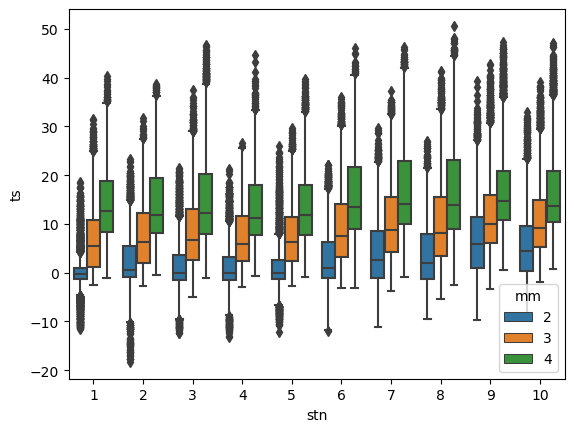

In [4]:
# 월별 지면온도 -> 확실히 증가하는 것을 확인할 수 있다.
sns.boxplot(x = 'stn', y = 'ts', data = spring, hue = 'mm')

<AxesSubplot:>

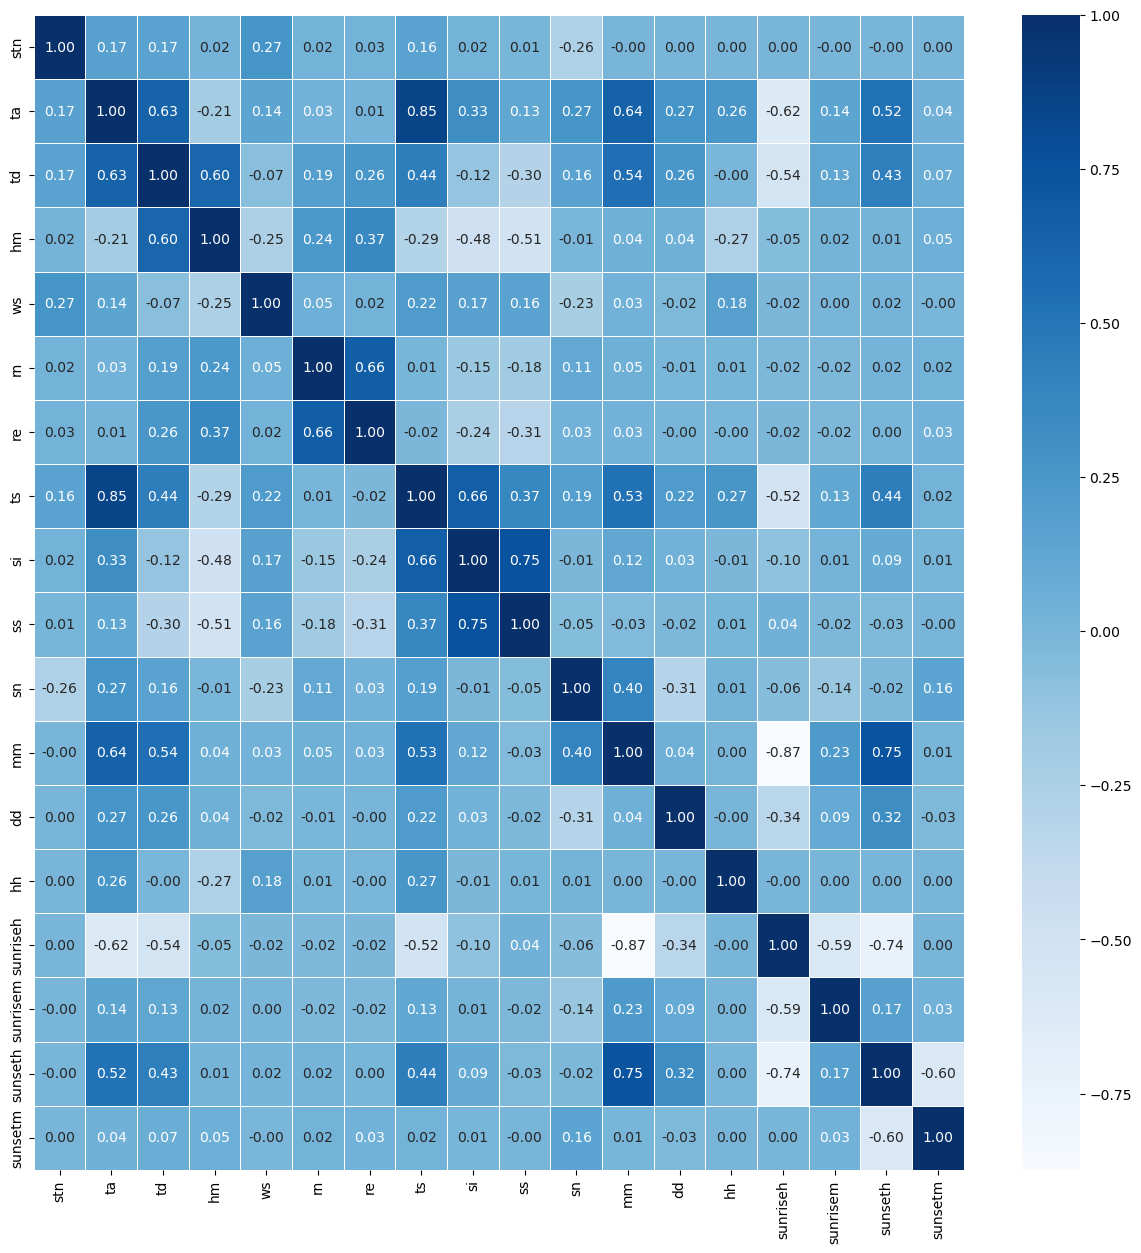

In [5]:
# 변수의 전체적인 상관관계
plt.figure(figsize=(15,15))
sns.heatmap(data = spring.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [6]:
# 간략한 그래프
spring.describe()

,stn,ta,td,hm,ws,rn,re,ts,si,ss,sn,mm,dd,hh,sunriseh,sunrisem,sunseth,sunsetm
count,106887.000000,106879.000000,106878.000000,106883.000000,106825.000000,104779.000000,106685.000000,106887.000000,57953.000000,57862.000000,2217.000000,106887.000000,106887.000000,106887.000000,106887.000000,106887.000000,106887.000000,106887.000000
mean,5.499331,8.055260,-0.881281,57.883696,2.471252,0.083503,2.949599,9.267501,1.169520,0.573088,3.687821,3.019890,15.387765,11.498377,6.170797,29.507227,18.223956,26.258432
std,2.872764,6.692651,7.557594,22.417985,1.779360,0.548778,11.609213,9.305347,0.998482,0.450784,5.642859,0.807512,8.620816,6.923684,0.722673,17.045692,0.513382,18.396214
min,1.000000,-17.800000,-27.300000,4.800000,0.000000,0.000000,0.000000,-18.300000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,5.000000,0.000000,17.000000,0.000000
25%,3.000000,3.600000,-5.800000,40.000000,1.100000,0.000000,0.000000,2.100000,0.220000,0.000000,0.500000,2.000000,8.000000,5.000000,6.000000,15.000000,18.000000,11.000000
50%,5.000000,8.200000,-0.200000,56.600000,2.100000,0.000000,0.000000,7.800000,0.960000,0.800000,1.600000,3.000000,15.000000,11.000000,6.000000,30.000000,18.000000,21.000000
75%,8.000000,12.700000,4.500000,75.100000,3.400000,0.000000,0.000000,14.200000,2.000000,1.000000,4.300000,4.000000,23.000000,18.000000,7.000000,44.000000,19.000000,43.000000
max,10.000000,31.400000,19.700000,100.000000,16.100000,30.300000,60.000000,50.600000,3.870000,1.000000,37.400000,4.000000,31.000000,23.000000,7.000000,59.000000,19.000000,59.000000


### 지면온도
- 7월 한낮 지면온도도 최대 50도 넘는데 이것보다 훨씬 넘게 측정되는 봄의 날씨가 있다?
- 아무래도 이상치 추적해서 값 변경해야 할듯
- https://www.hkbs.co.kr/news/articleView.html?idxno=642190
- 34.7℃ 기온, 지면온도 51.3℃인데 31.4℃에서 지면온도가 60.3℃? 말이 안되는것 같다.

In [7]:
# 지면온도가 60도씨 이상인 지역 -> 이게 말이되나?
spring[spring['td'] == 0]

,stn,year,ta,td,hm,ws,rn,re,ww,ts,si,ss,sn,mm,dd,hh,sunriseh,sunrisem,sunseth,sunsetm
951,1,A,11.7,0.0,44.4,1.3,0.0,0.0,H,12.0,1.21,0.3,NaN,3,12,15,6,48,18,36
1248,1,A,4.8,0.0,71.1,1.3,0.0,0.0,C,5.0,NaN,NaN,NaN,3,25,1,6,29,18,48
1350,1,A,0.0,0.0,99.9,0.5,0.0,0.0,F,2.4,0.03,0.0,NaN,3,29,7,6,23,18,52
1500,1,A,18.2,0.0,29.4,1.3,0.0,0.0,H,21.5,2.43,1.0,NaN,4,4,13,6,14,18,57
1858,1,A,15.7,0.0,34.3,2.6,0.0,0.0,C,23.4,3.06,1.0,NaN,4,19,12,5,52,19,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105394,10,E,9.6,0.0,51.0,5.8,0.0,0.0,C,12.9,0.81,1.0,NaN,2,27,17,7,7,18,23
105501,10,E,6.6,0.0,62.6,3.7,0.0,0.0,C,4.2,NaN,NaN,NaN,3,4,4,7,0,18,28
105811,10,E,9.3,0.0,52.0,1.7,0.0,0.0,C,5.6,NaN,NaN,NaN,3,17,3,6,41,18,41
106307,10,E,16.0,0.0,34.2,5.5,0.0,0.0,C,11.8,NaN,NaN,NaN,4,6,20,6,11,18,59


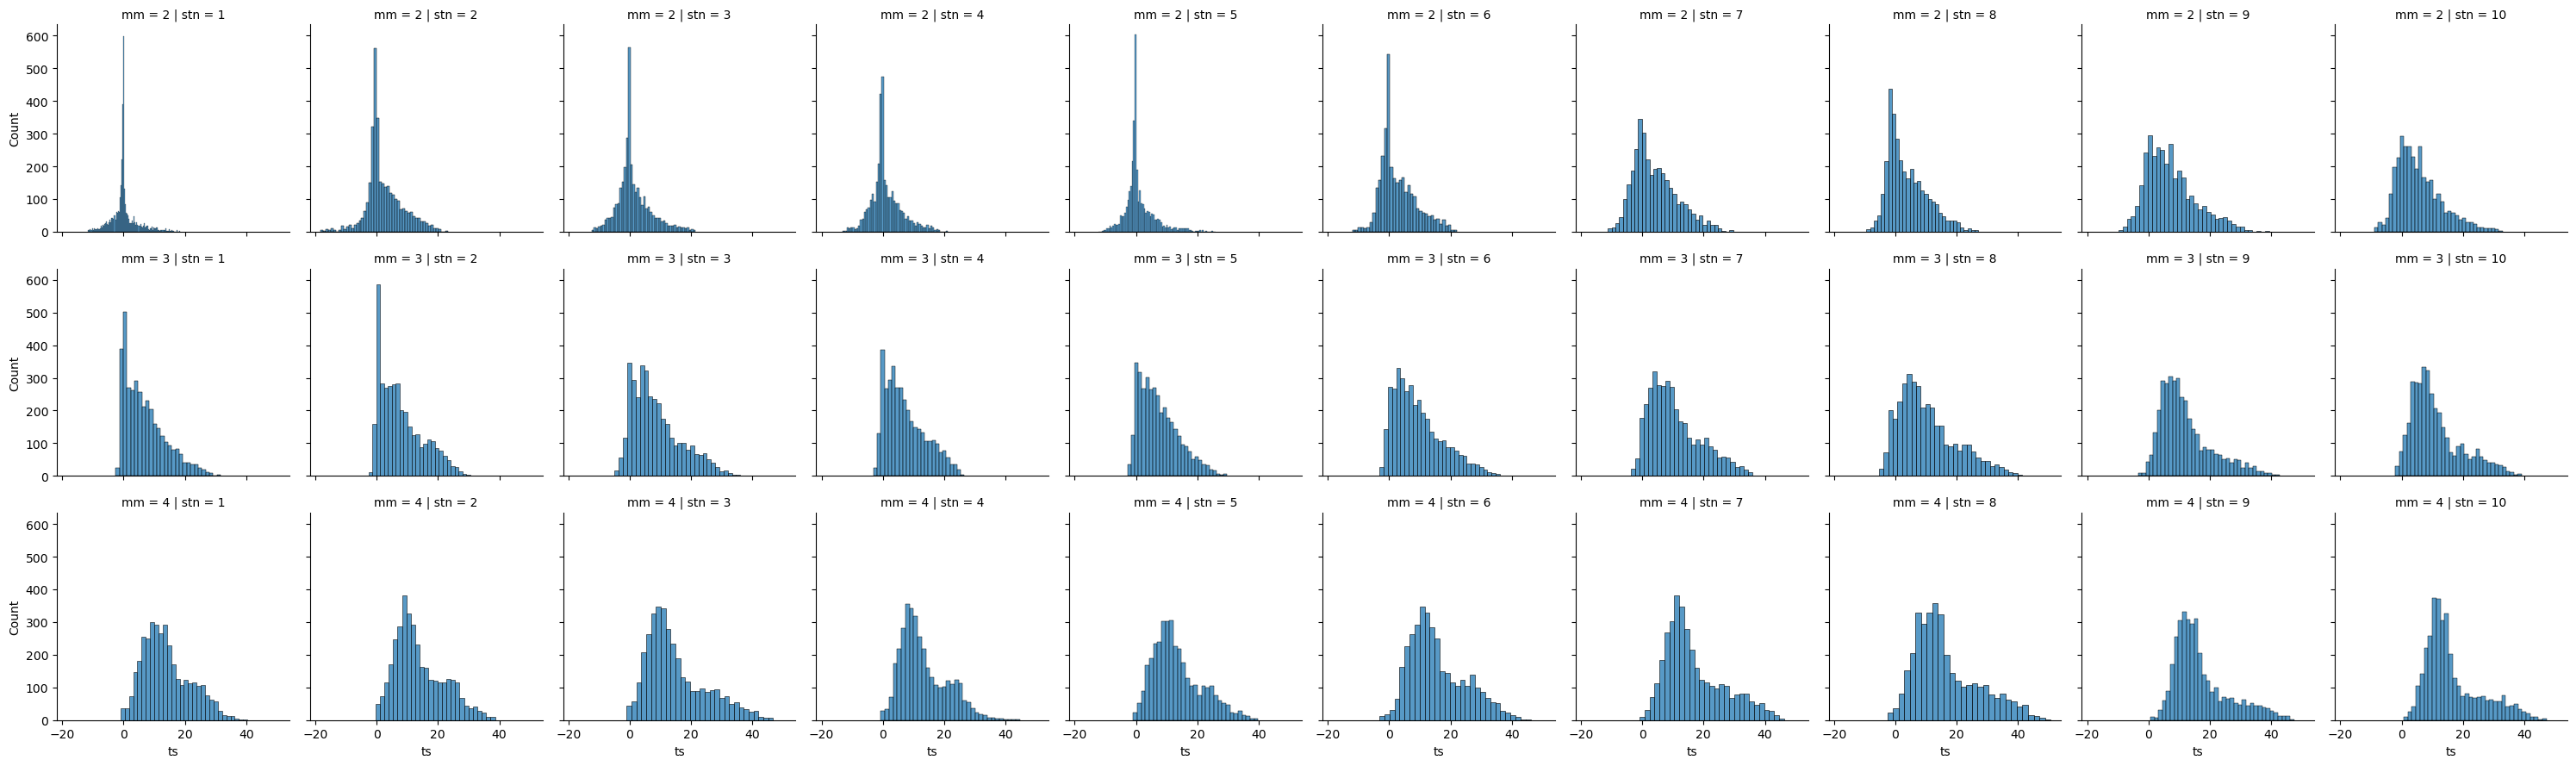

In [8]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"ts")

- 기온에 따른 지면온도를 보정해야 할 것으로 보임
- 일조량은 시간 단위로 되어있고 강수 유무는 분 단위로 되어있기 때문에 시간 단위를 맞춰야 될 것으로 보임
- 그래프를 대충 그려보니 월별 지면온도 차이가 확연히 들어나보이고, 지역 차이는 간혹가다 존재하는 것으로 보임.

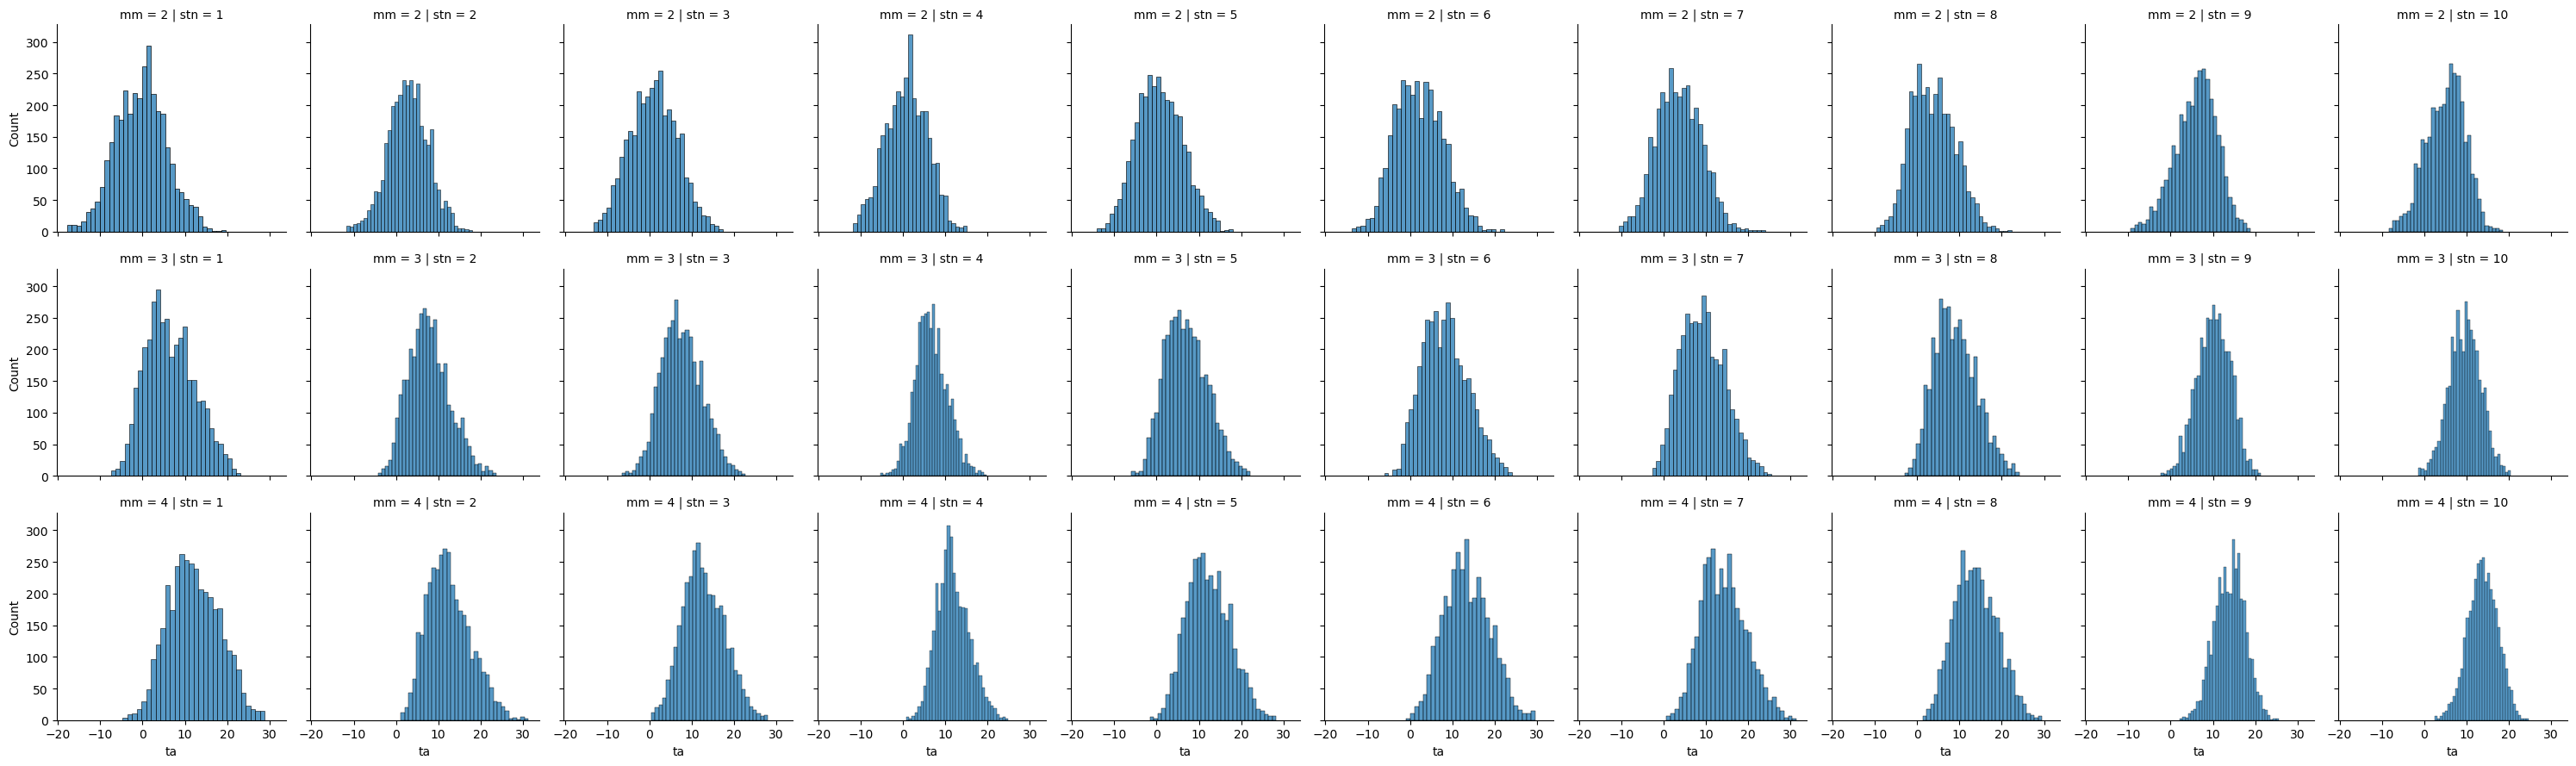

In [9]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"ta")

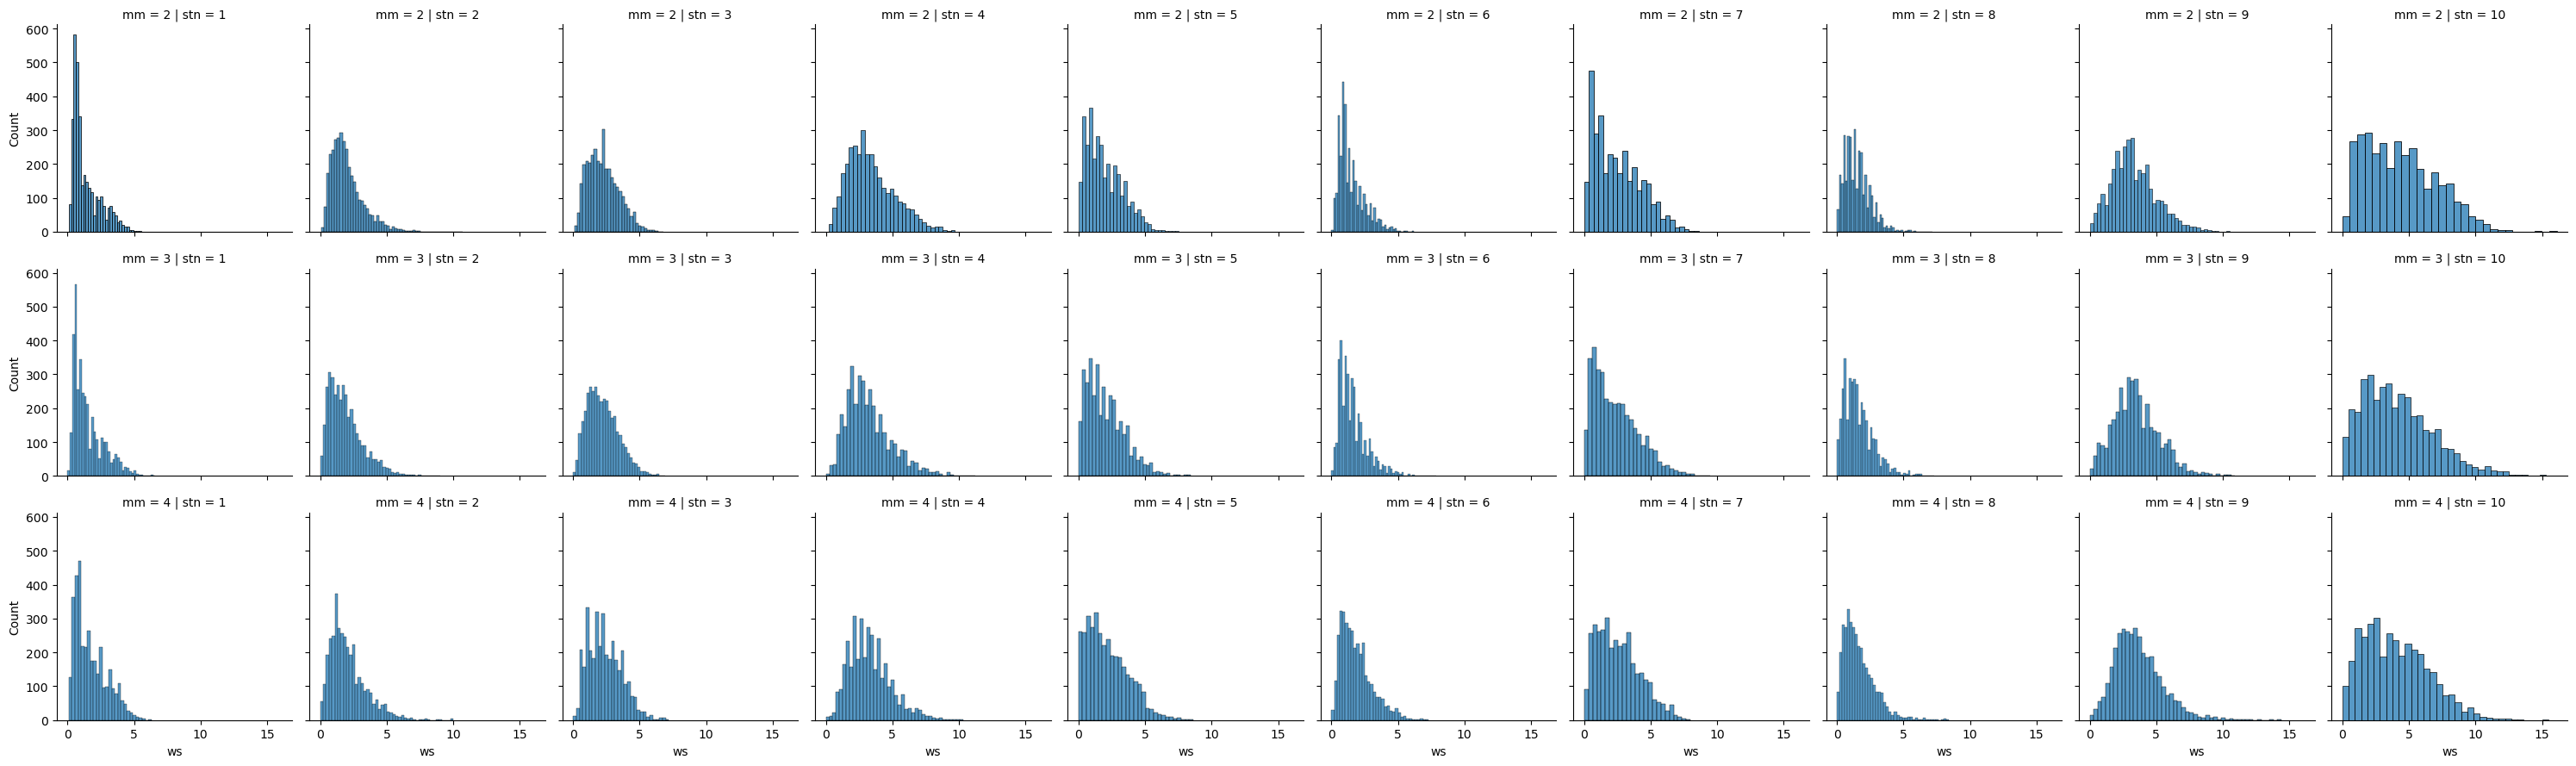

In [10]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"ws")

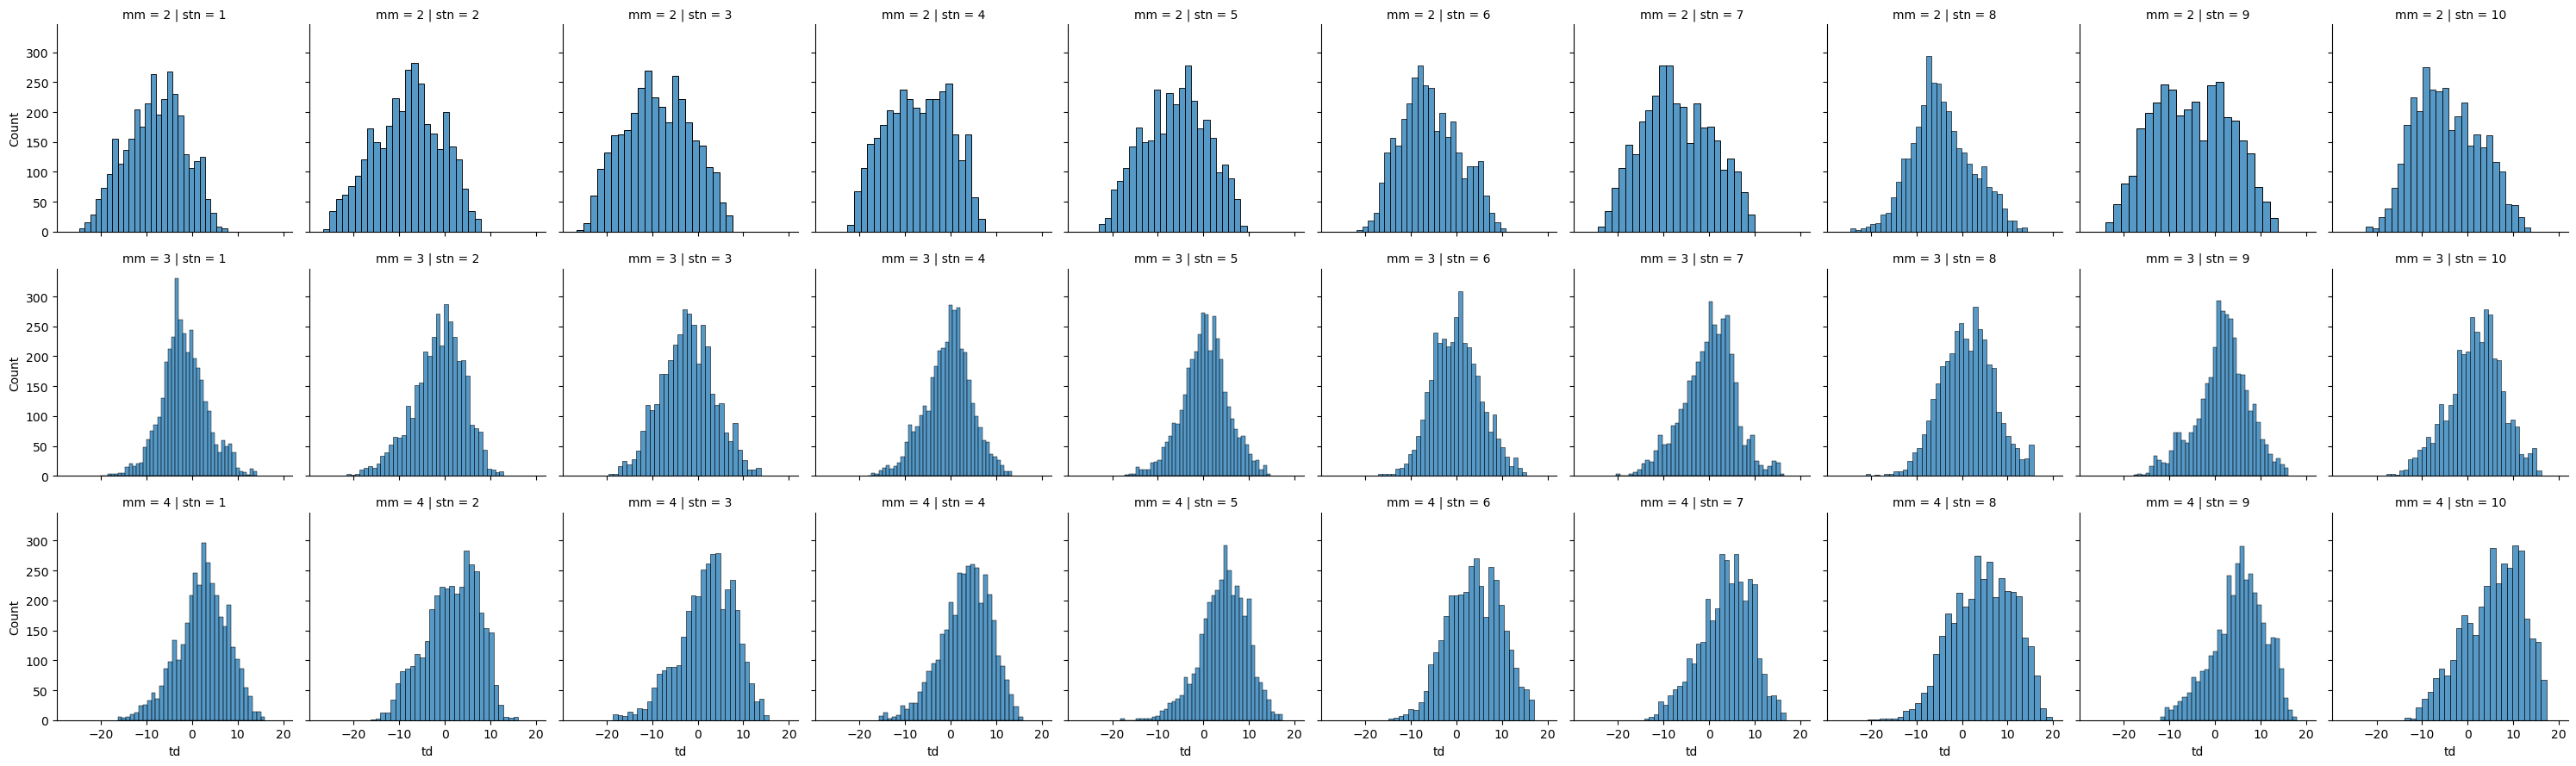

In [11]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"td")

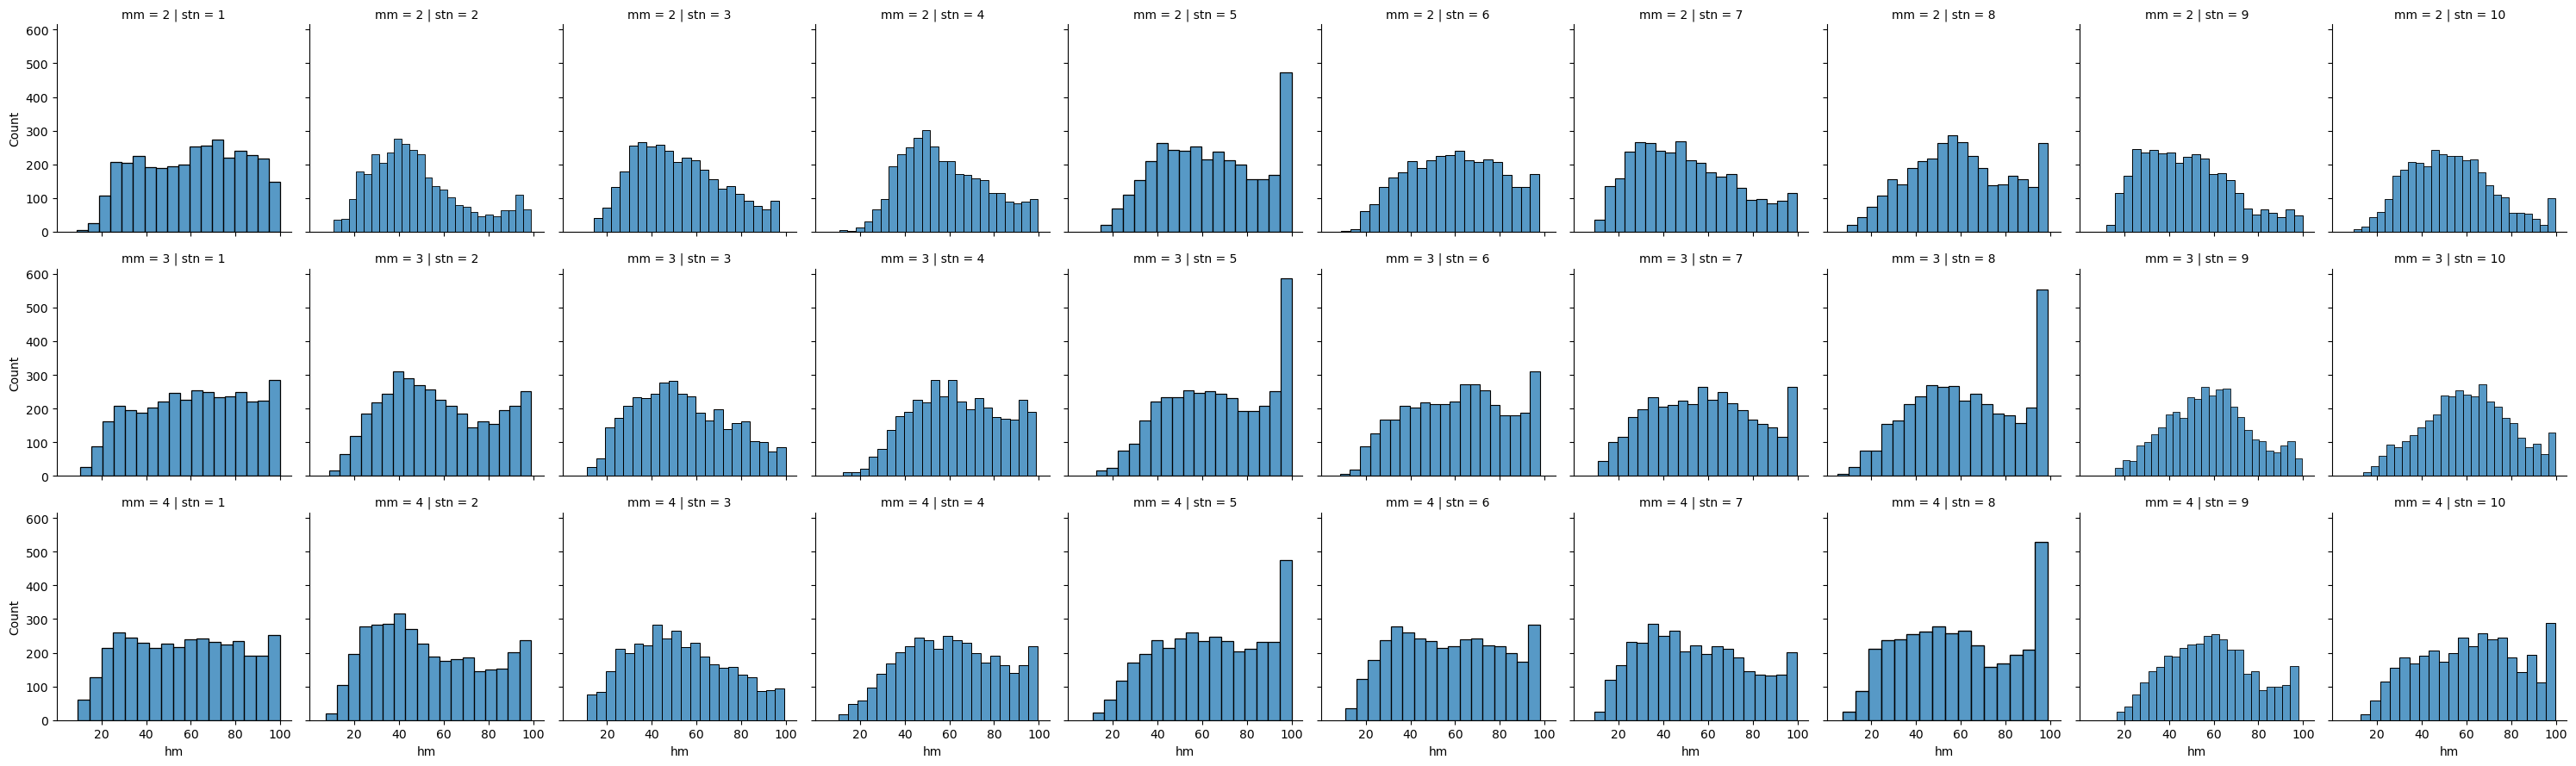

In [12]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"hm")

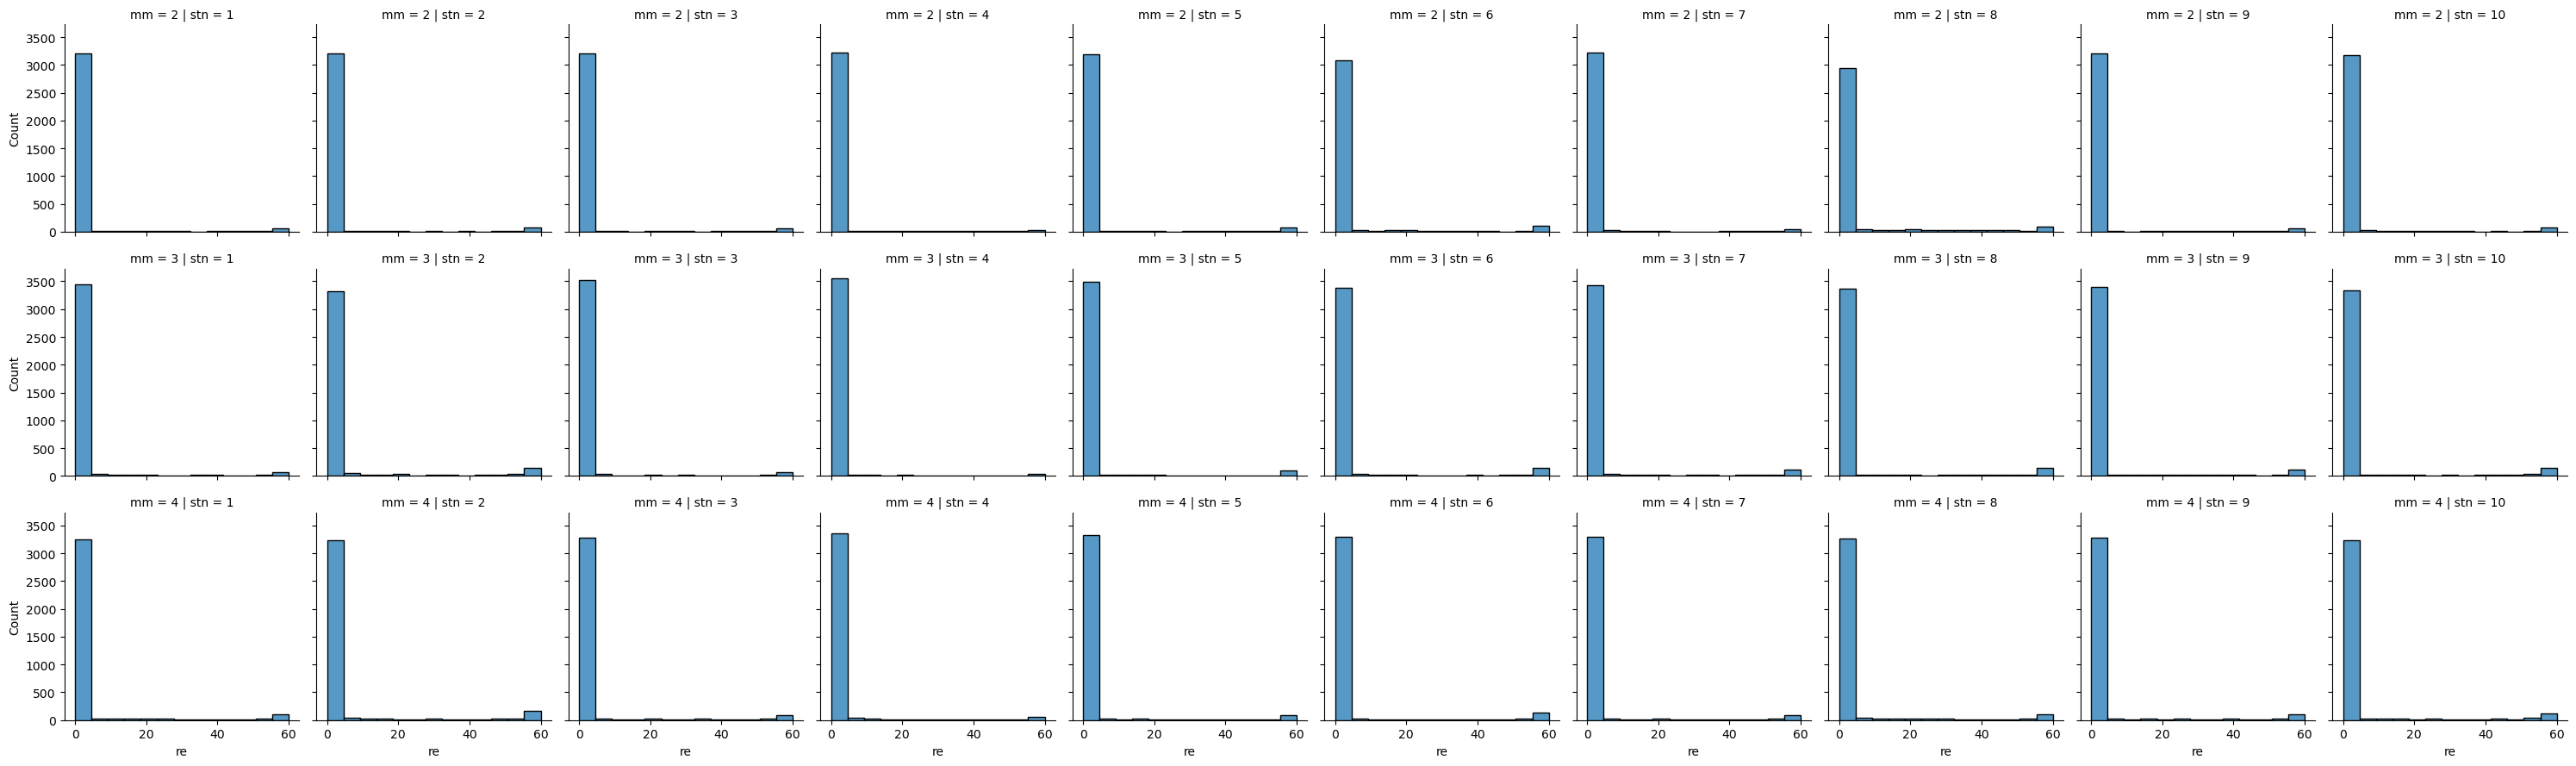

In [13]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"re")

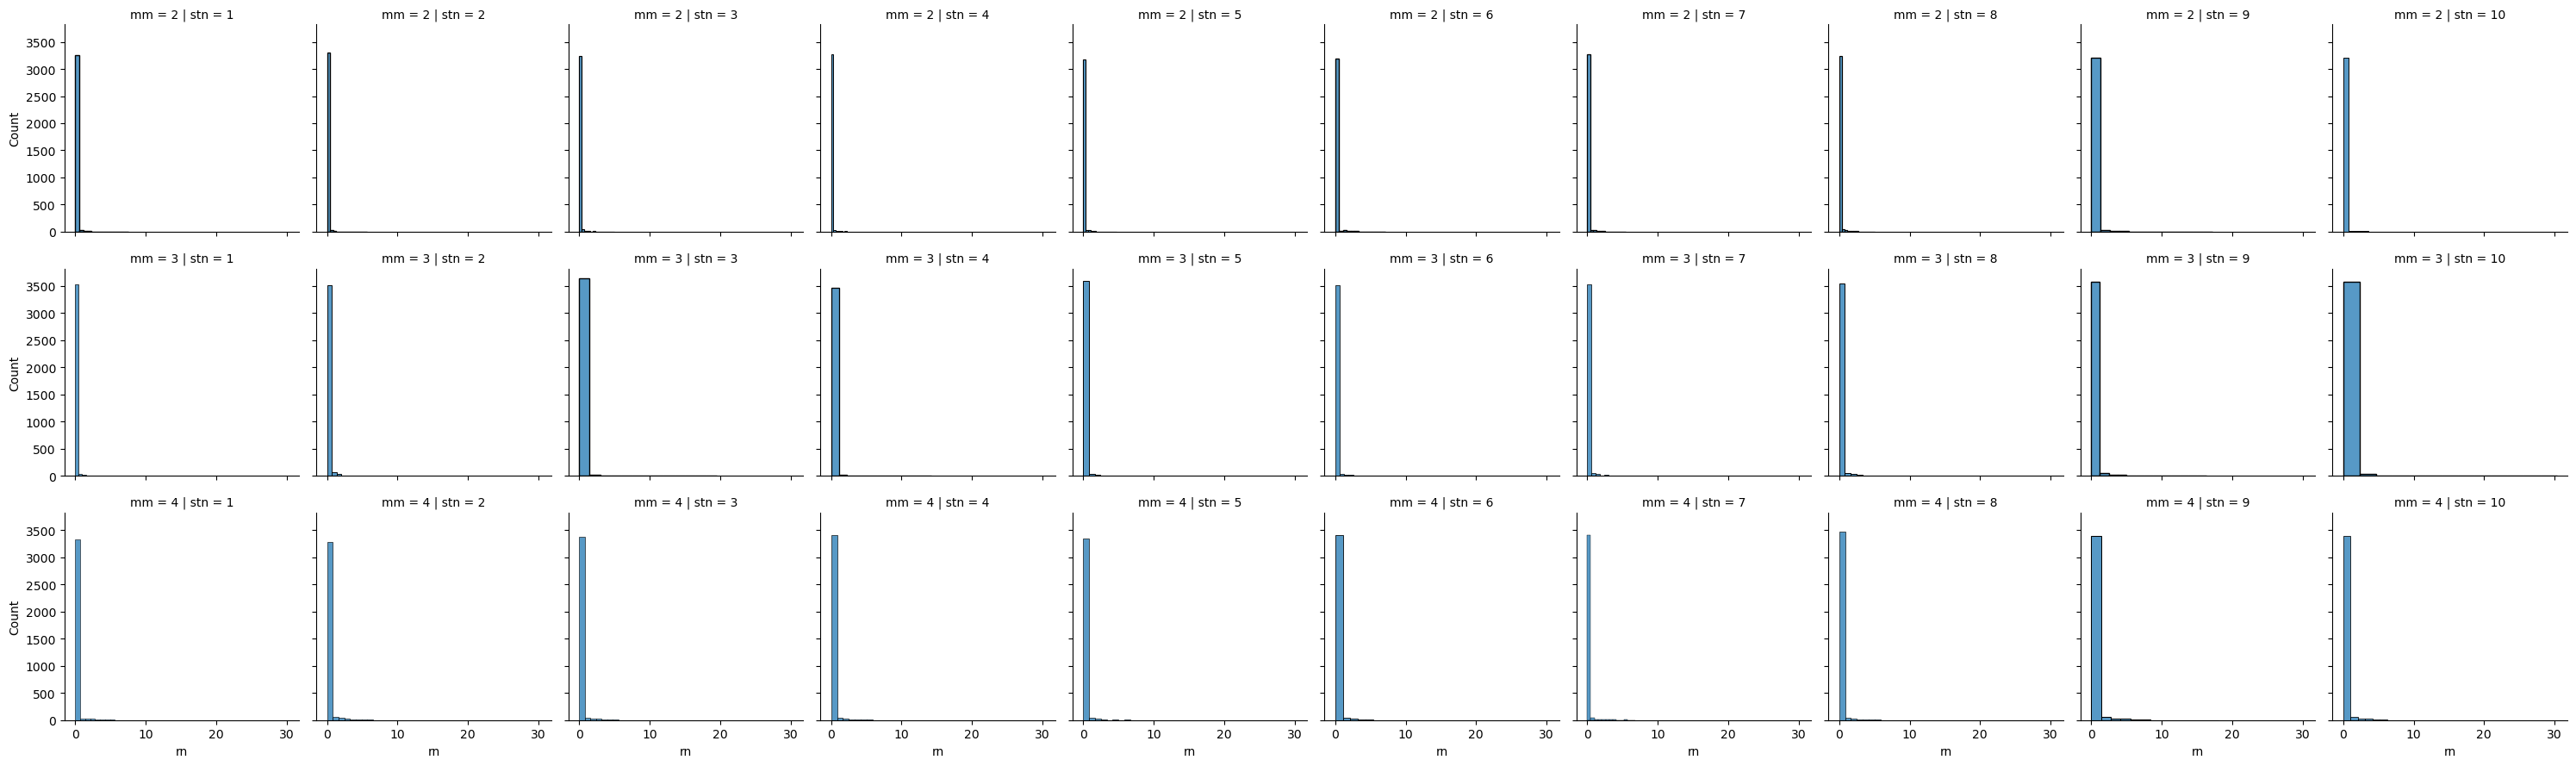

In [14]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"rn")

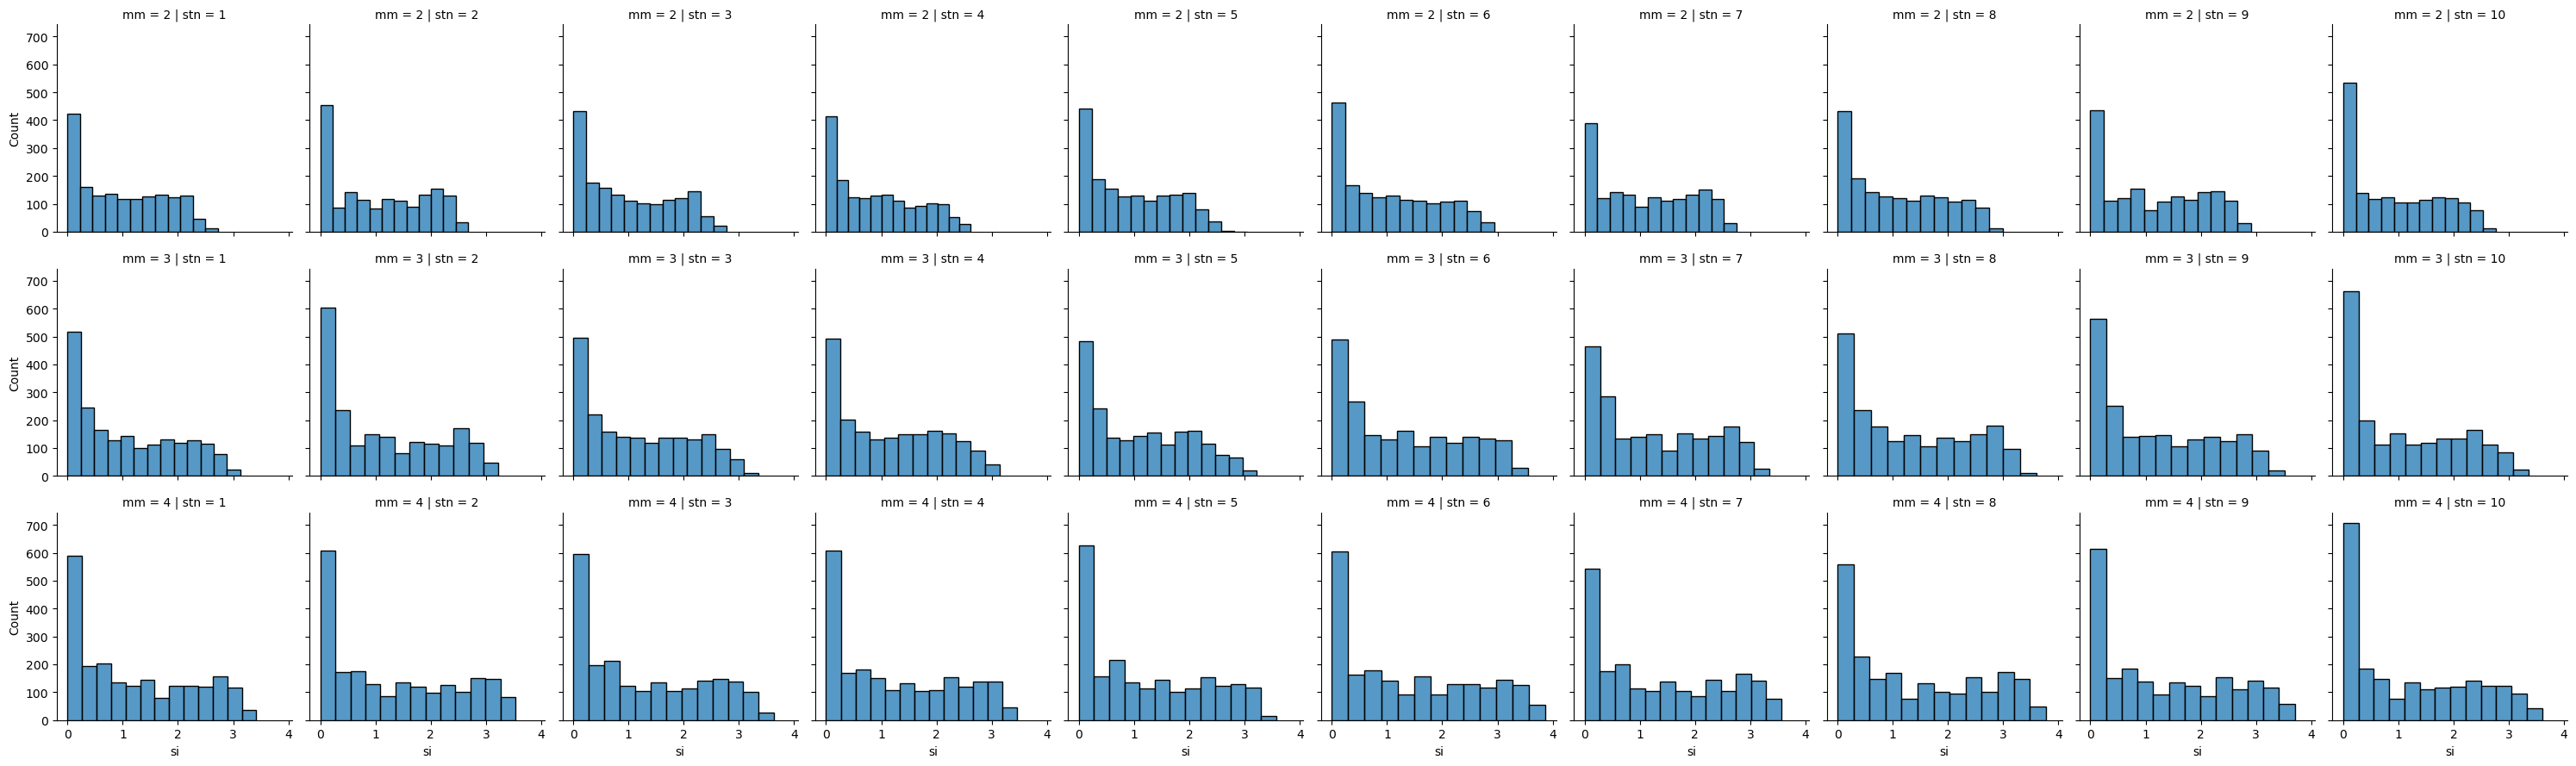

In [15]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"si")

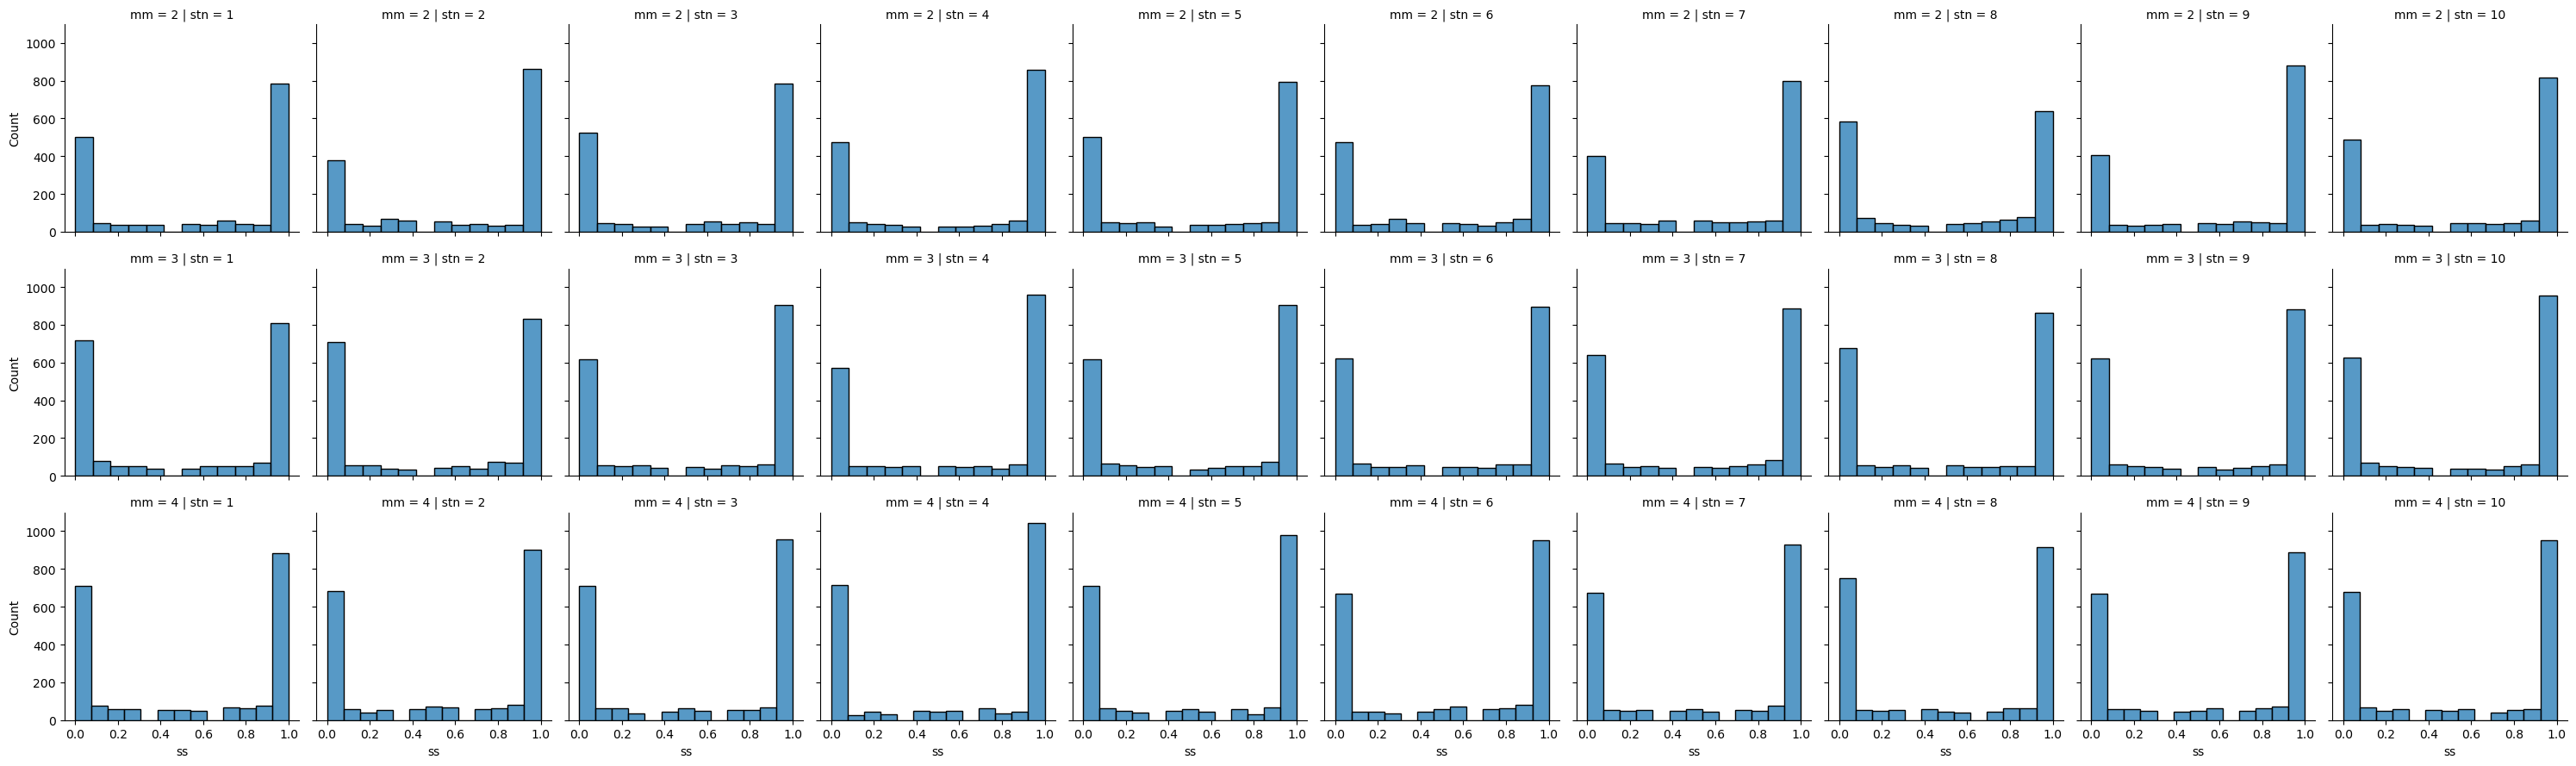

In [16]:
# 지역별 그래프
sns.FacetGrid(data = spring, col = "stn", row = 'mm').map(sns.histplot,"ss")